Retail Stores Sales

In [185]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [186]:
#dParser = lambda x: pd.datetime.strptime(x, format = "%Y-%m-%d %I-%p")
df = pd.read_csv(r"D:\Open Classroom\Datasets\Retail Store Sales\scanner_data.csv")#, parse_dates = ["Date"], date_parser = dParser)
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [187]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [188]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [190]:
df.shape

(131706, 7)

In [191]:
round(df.describe())

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.0,131706.0,131706.0,131706.0
mean,12386.0,32390.0,1.0,12.0
std,6086.0,18710.0,4.0,19.0
min,1.0,1.0,0.0,0.0
25%,7349.0,16134.0,1.0,4.0
50%,13496.0,32620.0,1.0,7.0
75%,17306.0,48548.0,1.0,12.0
max,22625.0,64682.0,400.0,708.0


In [192]:
df.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

In [193]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


In [195]:
df[["Year", "Month", "Day"]] = df["Date"].astype(str).str.split("-", expand = True)
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Year,Month,Day
0,2017-01-02,2547,1,X52,0EM7L,1.0,3.13,2017,01,02
1,2017-01-02,822,2,2ML,68BRQ,1.0,5.46,2017,01,02
2,2017-01-02,3686,3,0H2,CZUZX,1.0,6.35,2017,01,02
3,2017-01-02,3719,4,0H2,549KK,1.0,5.59,2017,01,02
4,2017-01-02,9200,5,0H2,K8EHH,1.0,6.88,2017,01,02


In [196]:
df[["Year", "Month", "Day", "Quantity"]] = df[["Year", "Month", "Day", "Quantity"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  int32         
 6   Sales_Amount    131706 non-null  float64       
 7   Year            131706 non-null  int32         
 8   Month           131706 non-null  int32         
 9   Day             131706 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 8.0+ MB


In [197]:
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Year,Month,Day
0,2017-01-02,2547,1,X52,0EM7L,1,3.13,2017,1,2
1,2017-01-02,822,2,2ML,68BRQ,1,5.46,2017,1,2
2,2017-01-02,3686,3,0H2,CZUZX,1,6.35,2017,1,2
3,2017-01-02,3719,4,0H2,549KK,1,5.59,2017,1,2
4,2017-01-02,9200,5,0H2,K8EHH,1,6.88,2017,1,2


In [198]:
df["Month_abb"] = df["Date"].dt.month_name()
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Year,Month,Day,Month_abb
0,2017-01-02,2547,1,X52,0EM7L,1,3.13,2017,1,2,January
1,2017-01-02,822,2,2ML,68BRQ,1,5.46,2017,1,2,January
2,2017-01-02,3686,3,0H2,CZUZX,1,6.35,2017,1,2,January
3,2017-01-02,3719,4,0H2,549KK,1,5.59,2017,1,2,January
4,2017-01-02,9200,5,0H2,K8EHH,1,6.88,2017,1,2,January


Text(0.5, 1.0, 'Monthly Sales for the Year 2017/2018')

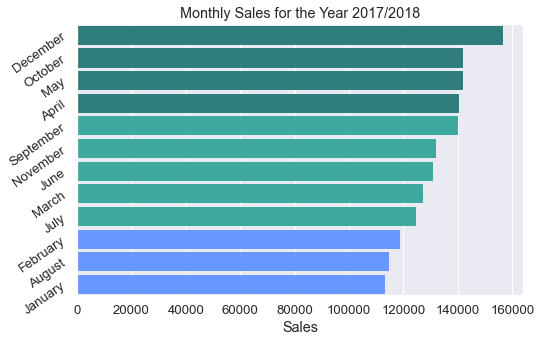

In [199]:
monthly_sales = df.groupby("Month_abb").agg({"Sales_Amount": "sum"}).sort_values(by = "Sales_Amount", ascending = False)
monthly_sales.head()
plt.figure(figsize = (8, 5))
ms_bar = sb.barplot(y = monthly_sales.index, x = monthly_sales["Sales_Amount"], data = monthly_sales)
for i in ms_bar.patches:
    if i.get_width() > 140000:
        i.set_color("#307D7E")
    elif i.get_width() > 120000:
        i.set_color("#3EA99F")
    else:
        i.set_color("#6698FF")
plt.xlabel("Sales")
plt.yticks(rotation = 35)
plt.ylabel(None)
plt.title("Monthly Sales for the Year 2017/2018")

Text(0.5, 1.0, 'Sales Per Day Projections')

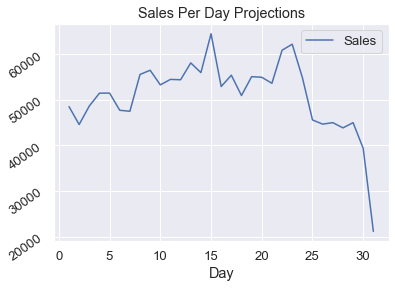

In [200]:
daily_sales = df.groupby("Day").agg({"Sales_Amount": "sum"}).sort_values(by = "Sales_Amount", ascending = False)
sb.lineplot(x = daily_sales.index, y = daily_sales["Sales_Amount"], data = daily_sales, label = "Sales")
plt.yticks(rotation = 35)
plt.ylabel(None)
plt.legend(loc = "best")
plt.title("Sales Per Day Projections")

Its evident that from the 23rd day of the month sales depreciate in amount accounting for low profitability
However on 15th, retail stores record the highest sales per day

Performing One-Hot Encoding

Using the DecisionTreeClassifier() for classification

In [218]:
le = LabelEncoder()

X = df[["Quantity", "Sales_Amount"]]
y = df[["Month_abb"]]
#y = y.apply(le.fit_transform)

DTR = DecisionTreeClassifier()
DTR.fit(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

DTR.predict([[3, 200]])

array(['May'], dtype=object)

In [220]:
#le = LabelEncoder()

X = df[["Quantity", "Sales_Amount"]]
y = df["Month_abb"]
#y = y.apply(le.fit_transform)

DTR = DecisionTreeClassifier()
DTR.fit(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

DTR.predict([[3, 160]])

array(['April'], dtype=object)